<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_02_Spreidingsmaten_zelfgeschreven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:PERU">Labo 02 Spreidingsmaten opgave</span>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

De dataset die in deze opdracht gebruikt wordt zal jullie (normaalgezien) bekend voorkomen. Het is dezelfde student dataset waar in de opdrachten rond centrummaten mee gewerkt werd. In onderstaande tabel kunnen julie toch nog eens de naam van de kolom en hun betekenis terugvinden.

| Variable Name |Description |
| --- | --- |
|school 	|student's school (binary; 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) |
|sex|	student's sex (binary: 'F' - female or 'M' - male)|
|age |	 student's age|
|address  |	student's home address type (binary: 'U' - urban or 'R' - rural)|
|famsize |	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|
|Pstatus |	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|
|Medu  	|other's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)|
|Fedu |	ather's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher
|reason |	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|
|traveltime|	home to school travel time (numeric: 1 - 1 hour)|
|studytime	|weekly study time (numeric: 1 - 10 hours)|
|failures |	number of past class failures (numeric: n if 1<=n<3, else 4)|
|activities 	| extra-curricular activities (binary: yes or no)
|nursery  |	attended nursery school (binary: yes or no)|
|higher|	wants to take higher education (binary: yes or no)|
|internet |	Internet access at home (binary: yes or no)|
|romantic|	with a romantic relationship (binary: yes or no)|
|famrel |	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|freetime |	free time after school (numeric: from 1 - very low to 5 - very high)|
|goout |	going out with friends (numeric: from 1 - very low to 5 - very high)|
|Dalc |	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|Walc |	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|health |	current health status (numeric: from 1 - very bad to 5 - very good)|
|absences |	number of school absences|
|G1 |	first period grade (numeric: from 0 to 20)|
|G2  |	second period grade (numeric: from 0 to 20)|
|G3 |	final grade (numeric: from 0 to 20, output target)|

In [ ]:
# Importeren van de dataset
df = pd.read_csv("Students.csv")

In [ ]:
# toon de eerste 5 rijen
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,course,2,2,0,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,course,1,2,0,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,other,1,2,3,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,home,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,home,1,2,0,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Hoeveel studenten zijn er in de dataset?

In [ ]:
df['sex'].value_counts()
print(f" There  are 295 students")

 There  are 295 students


Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden?

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Wat is het maximum aantal afwezigheden van een student? Wat is de leeftijd van deze student?

In [ ]:
maximum_aantal_afwezigheden = df['absences'].max()
df[maximum_aantal_afwezigheden].age.count()


KeyError: 75

De fout in je code zit in de volgende regel:

```python
df[maximum_aantal_afwezigheden].age.count()
```

### Wat gaat er mis?

1. **`maximum_aantal_afwezigheden` is een enkele waarde**:
   De variabele `maximum_aantal_afwezigheden` bevat de maximale waarde uit de kolom `absences`. Dit is een enkele numerieke waarde (bijvoorbeeld 30). Wanneer je `df[maximum_aantal_afwezigheden]` probeert te gebruiken, interpreteert Python dat alsof je probeert een rij of kolom met die naam op te halen, wat fout is.

2. **Hoe data filteren werkt in Pandas**:
   Je moet een voorwaarde gebruiken om rijen te selecteren. Bijvoorbeeld, om rijen te vinden waar `absences` gelijk is aan de maximale waarde, moet je een logische vergelijking maken.

---

### Correcte Code

Als je de leeftijd (`age`) wilt tellen voor studenten met het maximale aantal afwezigheden, kun je dit corrigeren als volgt:

```python
# Vind de maximale waarde in de kolom 'absences'
maximum_aantal_afwezigheden = df['absences'].max()

# Filter de rijen waar 'absences' gelijk is aan de maximale waarde
resultaat = df[df['absences'] == maximum_aantal_afwezigheden]

# Tel het aantal rijen in de 'age'-kolom
aantal = resultaat['age'].count()

# Print het resultaat
print(aantal)
```

---

### Uitleg van de Correcte Code

1. **`df['absences'] == maximum_aantal_afwezigheden`**:

   * Dit genereert een logische reeks (`True` of `False`) voor elke rij in de dataset, afhankelijk van of de waarde in `absences` gelijk is aan de maximale waarde.

2. **`df[<voorwaarde>]`**:

   * Dit filtert de rijen in de dataframe waar de voorwaarde `True` is.

3. **`.count()`**:

   * Dit telt het aantal niet-lege waarden in de `age`-kolom van de gefilterde dataframe.

---

Laat me weten als je nog vragen hebt!


In [ ]:
maximum_aantal_afwezigheden = df['absences'].max()
# Filter the DataFrame for rows where 'absences' equals the maximum value
student_with_max_absences = df[df['absences'] == maximum_aantal_afwezigheden]
# Get the age of the student(s) with maximum absences
age_of_student_with_max_absences = student_with_max_absences['age'].values[0]  # Assuming only one student has max absences

print(f"The age of the student with maximum absences ({maximum_aantal_afwezigheden}) is: {age_of_student_with_max_absences}")

The age of the student with maximum absences (75) is: 18


Wat is de finale score van de oudste student?

In [ ]:
oudste_student = df['age'].max()
oudste_student_finale_score  = df[df['age'] == oudste_student]
finale_score_van_oudste_student = oudste_student_finale_score['G3'].values[0]
print(f"De finale score van de student met de meeste absences ({oudste_student}) is: {finale_score_van_oudste_student}")


De finale score van de student met de meeste absences (22) is: 8


Hoeveel vrije tijd had de student met de hoogste score?

In [ ]:
hoogste_score = df['G3'].max()
student_met_hoogste_score = df[df['G3'] == hoogste_score]
vrije_tijd_van_student_met_hoogste_score = student_met_hoogste_score['freetime'].values[0]
print(f"De student met de hoogste score ({hoogste_score}) had {vrije_tijd_van_student_met_hoogste_score} vrij tijd")

De student met de hoogste score (20) had 2 vrij tijd


Maak een histogram van het aantal studenten volgens hun finale score.

In [ ]:
gemiddelde = df['G3'].mean()
mediaan = df['G3'].median()
variantie = df['G3'].var
standaardafwijking = df['G3'].std()
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)
IQR = Q3 - Q1
variatiebreedte = df['G3'].max() - df['G3'].min()
scheefheid = df['G3'].skew()
piekvorm = df['G3'].kurt()
print(gemiddelde)
print(mediaan)
print(variantie)
print(standaardafwijking)
print(Q1)
print(Q3)
print(IQR)
print(variatiebreedte)
print(scheefheid)
print(piekvorm)

10.415189873417722
11.0
<bound method Series.var of 0       6
1       6
2      10
3      15
4      10
5      15
6      11
7       6
8      19
9      15
10      9
11     12
12     14
13     11
14     16
15     14
16     14
17     10
18      5
19     10
20     15
21     15
22     16
23     12
24      8
25      8
26     11
27     15
28     11
29     11
30     12
31     17
32     16
33     12
34     15
35      6
36     18
37     15
38     11
39     13
40     11
41     12
42     18
43     11
44      9
45      6
46     11
47     20
48     14
49      7
50     13
51     13
52     10
53     11
54     13
55     10
56     15
57     15
58      9
59     16
60     11
61     11
62      9
63      9
64     10
65     15
66     12
67      6
68      8
69     16
70     15
71     10
72      5
73     14
74     11
75     10
76     10
77     11
78     10
79      5
80     12
81     11
82      6
83     15
84     10
85      8
86      6
87     14
88     10
89      7
90      8
91     18
92      6
93     10
94     1

Text(0.5, 1.0, 'Histogram G3 scores')

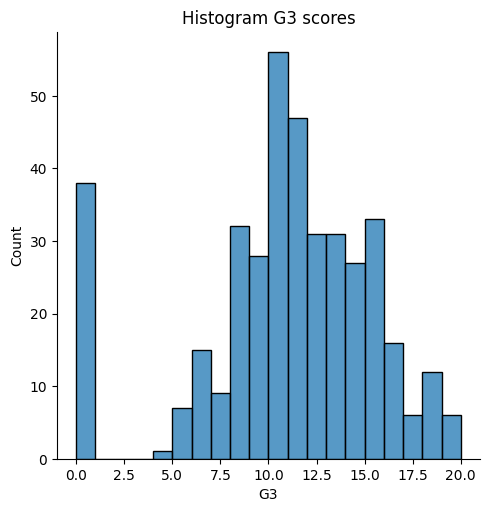

In [ ]:
klassenbreedte = variatiebreedte/np.sqrt(df['G3'].count())
maximum = df['G3'].max()
minimum = df['G3'].min()
bins = np.arange(start=minimum,stop=maximum+round(klassenbreedte),step=round(klassenbreedte))
sns.displot(x=df['G3'],bins=bins,kde=False)
plt.title("Histogram G3 scores")

Bereken nu de centrummaten en spreidingsmaten van de finale score (G3). Bepaal met andere woorden:
- Het gemiddelde - mean()
- De mediaan - median()
- Variantie - var()
- Standaardafwijking - std()
- De range - max() - min()
- Q1 en Q3 en bereken hieruit de interkwartielafstand: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
- De scheefheid - skew()
- De kurtosis - kurt()

Reflecteren deze centrummaten en spreidingsmaten wat je afleest op het histogram? Kijk dan vooral naar het gemiddelde, standaardafwijking en scheefheid

gemiddelde en mediaan het is linksscheef verdeeld aaangezien gemiddelde kleiner is dan de mediaan skew is negatief

Maak een boxplot van de finale score, zijn er uitschieters aanwezig in de dataset?

Text(0.5, 1.0, 'Boxplot van de finale score')

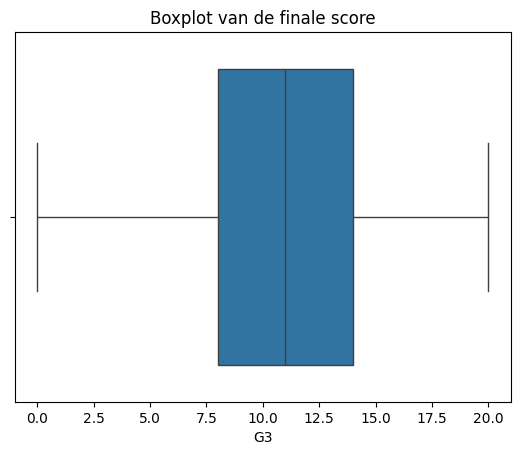

In [ ]:
sns.boxplot(data=df,x='G3',whis=1.5)
plt.title('Boxplot van de finale score')

Iemand beweert dat personen in een relatie slechter scoren op de finale test dan iemand die single is. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven

([<matplotlib.axis.XTick at 0x7f7722b504d0>,
 [Text(0, 0, 'single'), Text(1, 0, 'in relatie')])

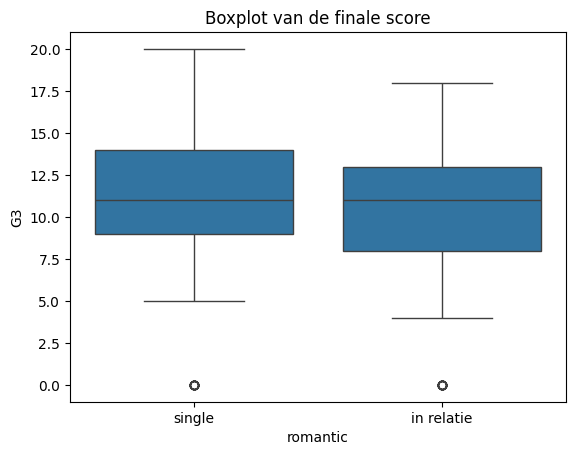

In [ ]:
sns.boxplot(data=df,x='romantic',y='G3',whis=1.5)
plt.title('Boxplot van de finale score')
plt.xticks([0,1],['single','in relatie'])

Dezelfde persoon beweert ook dat studenten die verder willen studeren beter scoren dan studenten die dit niet willen. Klopt deze bewering?  </br>  Gebruik de centrummaten en spreidingsmaten alsook de boxplot om je antwoord te argumenteren.

([<matplotlib.axis.XTick at 0x7f772300ce90>,
 [Text(0, 0, 'ja'), Text(1, 0, 'nee')])

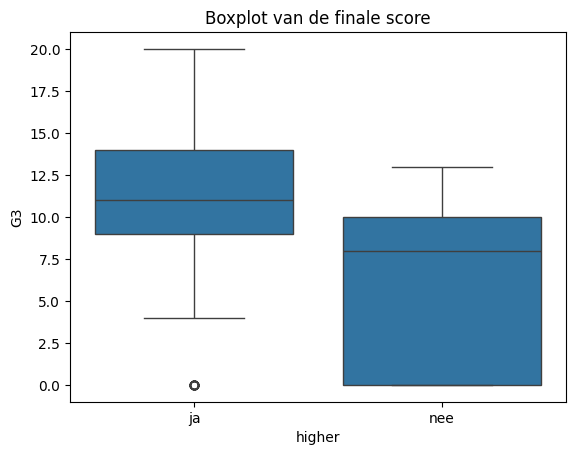

In [ ]:
sns.boxplot(data=df,x='higher',y='G3',whis=1.5)
plt.title('Boxplot van de finale score')
plt.xticks([0,1],['ja','nee'])

In [53]:
import pandas as pd


# Controleer unieke waarden in 'higher'
print("Unieke waarden in 'higher':", df['higher'].unique())

# Controleer ontbrekende waarden
print("Ontbrekende waarden in 'higher':", df['higher'].isna().sum())
print("Ontbrekende waarden in 'G3':", df['G3'].isna().sum())

# Splits data op basis van 'higher'
yes_higher = df[df['higher'] == 'yes']['G3']
no_higher = df[df['higher'] == 'no']['G3']

# Bereken en toon statistieken
print("\nStatistieken voor studenten die verder willen studeren ('yes'):")
print(f"Gemiddelde: {yes_higher.mean():.2f}, Mediaan: {yes_higher.median():.2f}, Std: {yes_higher.std():.2f}")

print("\nStatistieken voor studenten die niet verder willen studeren ('no'):")
print(f"Gemiddelde: {no_higher.mean():.2f}, Mediaan: {no_higher.median():.2f}, Std: {no_higher.std():.2f}")


Unieke waarden in 'higher': ['yes' 'no']
Ontbrekende waarden in 'higher': 0
Ontbrekende waarden in 'G3': 0

Statistieken voor studenten die verder willen studeren ('yes'):
Gemiddelde: 10.61, Mediaan: 11.00, Std: 4.49

Statistieken voor studenten die niet verder willen studeren ('no'):
Gemiddelde: 6.80, Mediaan: 8.00, Std: 4.83


Bepaal de uitschieters bij de punten van het 2de semester(G2). Haalden studenten extreem hoge of lage punten?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking.

In [52]:
standaardafwijking = df['G2'].std()
Q1 = df['G2'].quantile(0.25)
Q3 = df['G2'].quantile(0.75)
IQR = Q3 - Q1
print(f" Standaardafwijking: {standaardafwijking}")
print(f" interkwartielafstand: {IQR}")
ondergrens = Q1-1.5*IQR
bovengrens = Q3 +1.5 * IQR
print(f"Ondergrens: {ondergrens}")
print(f"Bovengrens: {bovengrens}")
gemiddelde = df['G2'].mean()
print(f"Gemiddelde: {gemiddelde}")

standaardwijkingenbovengrens =  gemiddelde + 3*standaardafwijking
standaardwijkingenondergrens = gemiddelde - 3*standaardafwijking
print(f"Standaardwijkingen bovengrens: {standaardwijkingenbovengrens}")
print(f"Standaardwijkingen ondergrens: {standaardwijkingenondergrens}")


 Standaardafwijking: 3.761504659556034
 interkwartielafstand: 4.0
Ondergrens: 3.0
Bovengrens: 19.0
Gemiddelde: 10.713924050632912
Standaardwijkingen bovengrens: 21.998438029301013
Standaardwijkingen ondergrens: -0.57058992803519
